In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dane = pd.read_csv(r'C:\Users\Olga\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')
dane.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
dane2 = dane.copy()

In [3]:
dane2['JobRole'].replace({'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician': 3, 'Manufacturing Director': 4,
'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8,
'Human Resources' : 9}, inplace=True)
dane2 = dane2.drop(labels=['EmployeeCount', 'StandardHours', 'YearsWithCurrManager'], axis=1)

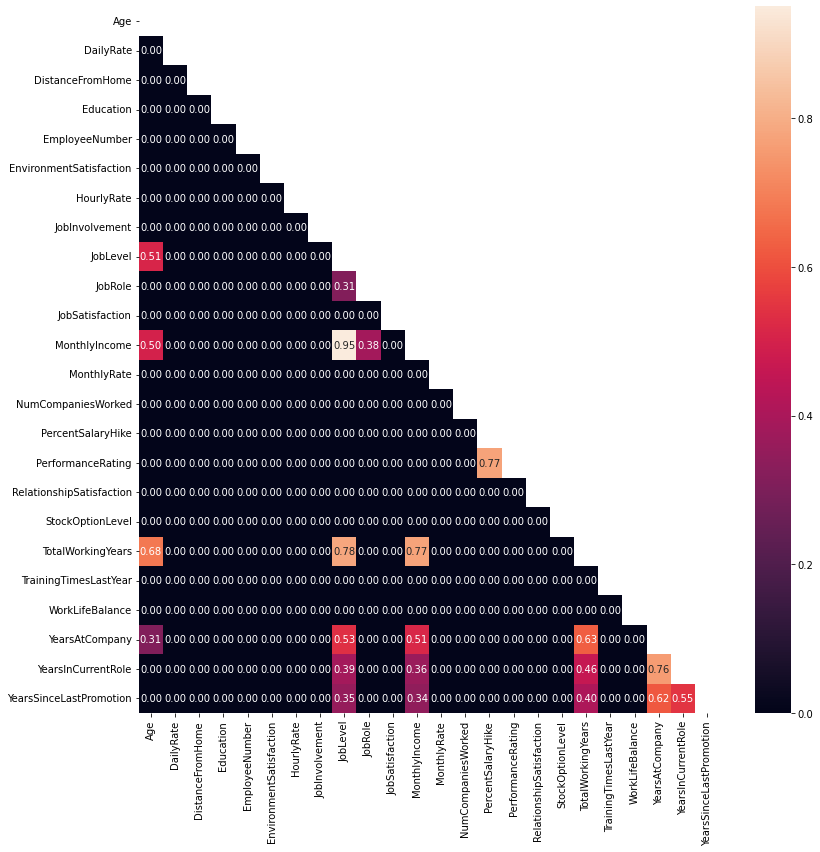

In [4]:
corr = dane2.corr()
plt.rcParams['figure.figsize'] = (13, 13)
mask = np.triu(corr)
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask);

In [3]:
def Age_rank(x):
    if (x >= 18) & (x <32):
        return "18-31"
    elif (x >= 32) & (x <46):
        return "32-45"
    elif (x >= 46) & (x <60):
        return "46-60"

dane['Age_rank'] = dane['Age'].apply(Age_rank)

In [2]:
def MonthlyIncome_rank(x):
    if (x >= 1009) & (x <5009):
        return "od 1009 do 5009"
    elif (x >= 5009) & (x <9009):
        return "od 5009 do 9009"
    elif (x >= 9009) & (x <13009):
        return "od 9009 do 13009"
    elif (x >= 13009) & (x <19999):
        return "od 13009 do 19999"
    
dane['MonthlyIncome_rank'] = dane['MonthlyIncome'].apply(MonthlyIncome_rank)

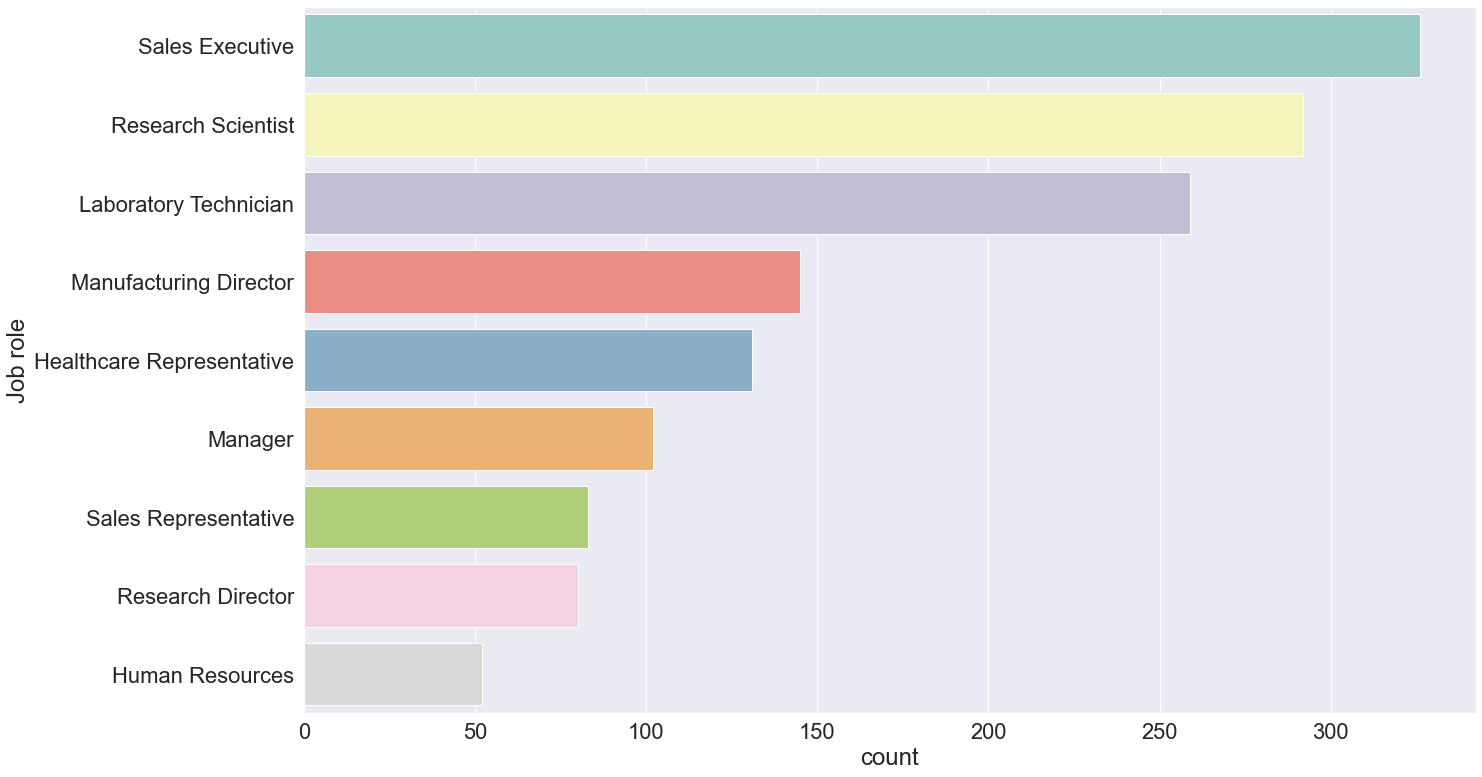

In [33]:
plt.figure(figsize=(21,13))
sns.set(font_scale = 2)
c=sns.countplot(data = dane, y = 'JobRole',palette="Set3")
c.set_ylabel('Job role');

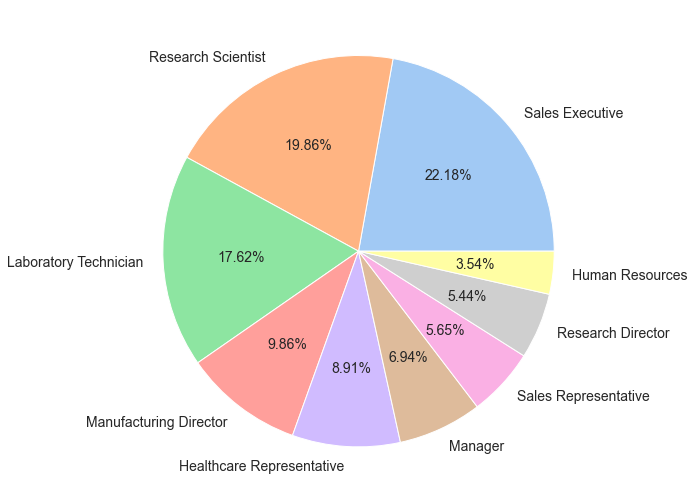

In [79]:
plt.figure(figsize=(18,9))
job_role=dane['JobRole'].value_counts()
colors = sns.color_palette('pastel')[0:9]
plt.pie(job_role, labels=job_role.index, autopct='%1.2f%%',textprops={'fontsize': 14},colors=colors)
plt.show()

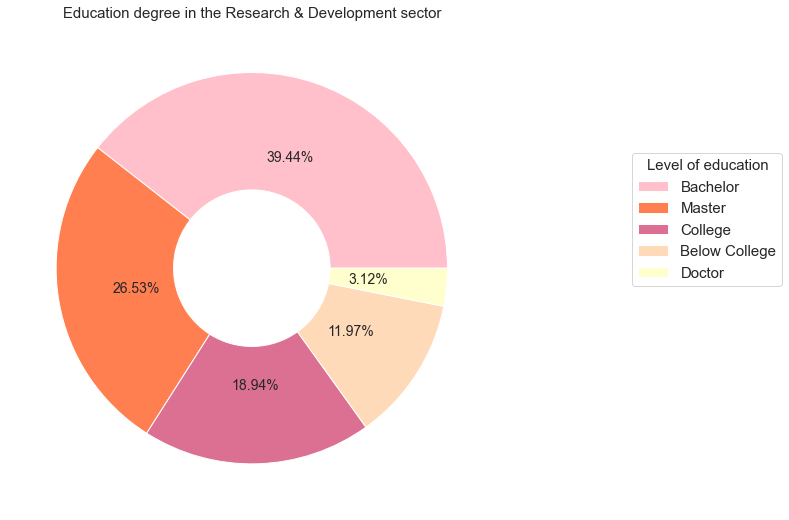

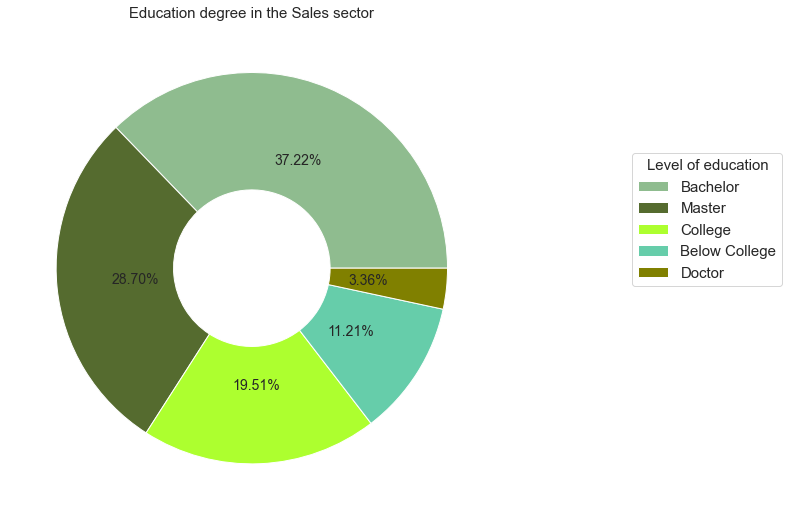

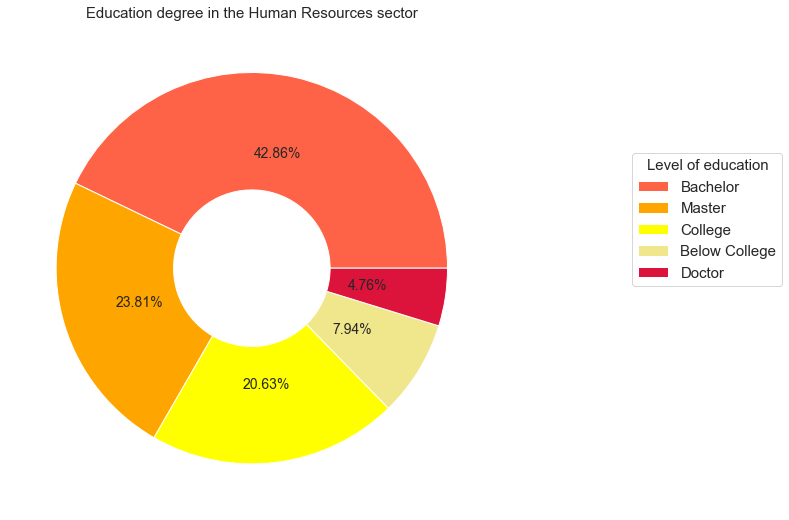

In [81]:
dep=dane[dane['Department']=='Research & Development']
job_role1=dep['Education'].value_counts()
colors= ["#FFC0CB","#FF7F50", "#DB7093","#FFDAB9", "#FFFFCD","#DC143C"]
plt.figure(figsize=(18,9))
plt.pie(job_role1, wedgeprops=dict(width=0.6), autopct='%1.2f%%',colors=colors,textprops={'fontsize': 14})
plt.title('Education degree in the Research & Development sector', fontsize = 15)
labels=["Bachelor", "Master", "College", "Below College", "Doctor"]
plt.legend(labels, bbox_to_anchor=(1.6,0.6), loc="center right", fontsize=15, title='Level of education',title_fontsize=15)

dep=dane[dane['Department']=='Sales']
job_role2=dep['Education'].value_counts()
colors= ["#8FBC8F","#556B2F", "#ADFF2F", '#66CDAA',"#808000"]
plt.figure(figsize=(18,9))
plt.pie(job_role2, wedgeprops=dict(width=0.6), autopct='%1.2f%%',colors=colors,textprops={'fontsize': 14})
plt.title('Education degree in the Sales sector', fontsize = 15)
labels=["Bachelor", "Master", "College", "Below College", "Doctor"]
plt.legend(labels, bbox_to_anchor=(1.6,0.6), loc="center right", fontsize=15, title='Level of education',title_fontsize=15)

dep=dane[dane['Department']=='Human Resources']
job_role3=dep['Education'].value_counts()
colors= ["#FF6347","#FFA500", '#FFFF00', '#F0E68C', '#DC143C']
plt.figure(figsize=(18,9))
plt.pie(job_role3, wedgeprops=dict(width=0.6), autopct='%1.2f%%',colors=colors,textprops={'fontsize': 14})
plt.title('Education degree in the Human Resources sector', fontsize = 15)
labels=["Bachelor", "Master", "College", "Below College", "Doctor"]
plt.legend(labels, bbox_to_anchor=(1.6,0.6), loc="center right", fontsize=15, title='Level of education',title_fontsize=15)
plt.show()

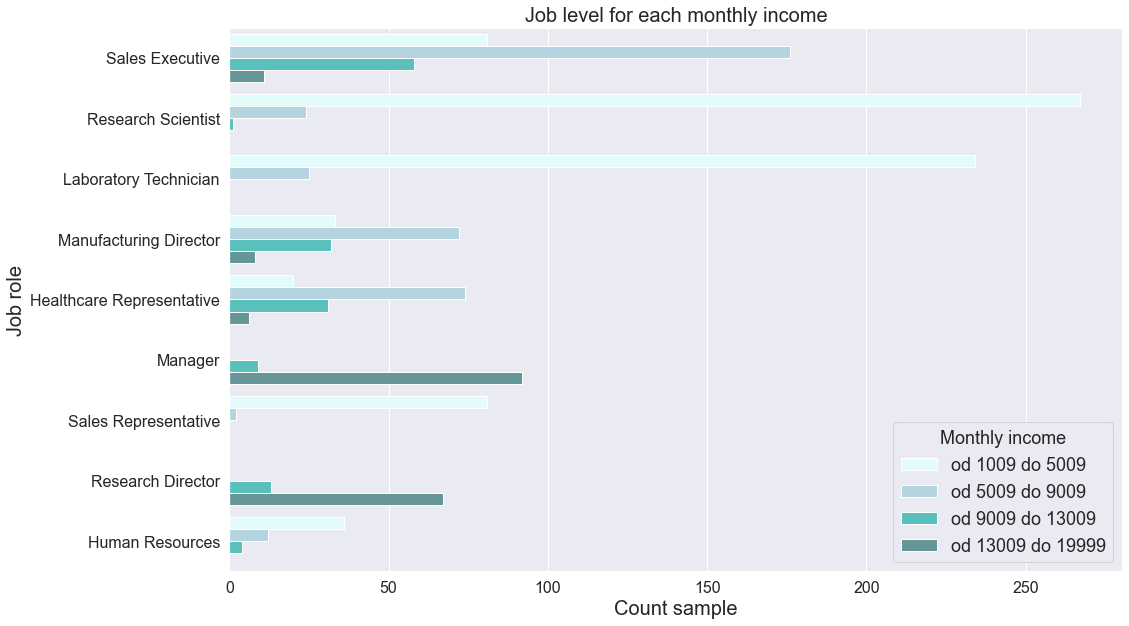

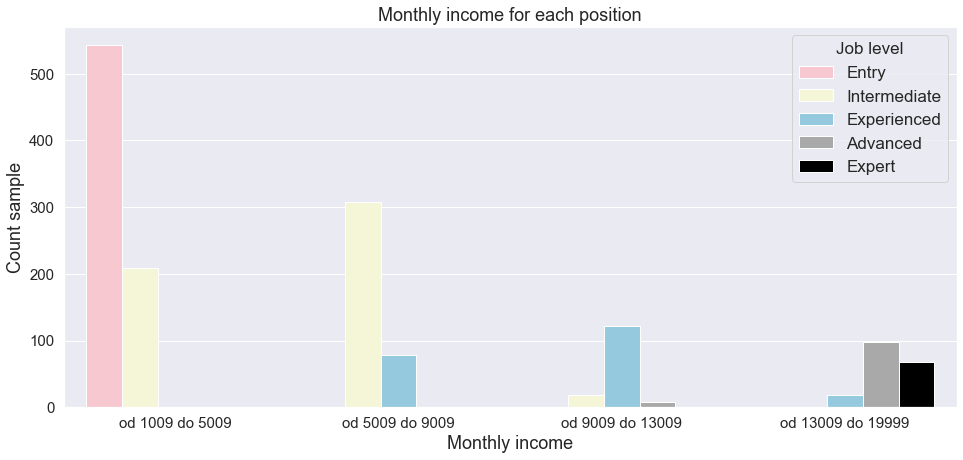

In [62]:
plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
a= pd.Categorical(dane['MonthlyIncome_rank'], categories = ['od 1009 do 5009','od 5009 do 9009', 'od 9009 do 13009', 'od 13009 do 19999'], ordered = True)
order = a.value_counts().index
ax=sns.countplot(y='JobRole', hue=a, data=dane, palette=["#E0FFFF","#ADD8E6", "#48D1CC",'#5F9EA0'])
ax.set_xlabel("Count sample",fontsize=20)
ax.set_ylabel("Job role",fontsize=20)
ax.tick_params(labelsize=16)
ax.set_title('Job level for each monthly income',fontsize=20)
ax.legend(title="Monthly income", fontsize = 18, title_fontsize=18,loc='lower right')

plt.figure(figsize=(16,7))
sns.set_style('darkgrid')
m= pd.Categorical(dane['MonthlyIncome_rank'], categories = ['od 1009 do 5009','od 5009 do 9009', 'od 9009 do 13009', 'od 13009 do 19999'], ordered = True)
order = m.value_counts().index
c=sns.countplot(x='MonthlyIncome_rank', hue='JobLevel', palette = ["#FFC0CB","#FAFAD2", "#87CEEB","#A9A9A9","#000000"], data=dane,order=order)
c.set_xlabel('Miesięczny przychód')
c.tick_params(labelsize=15)
c.set_xlabel("Monthly income",fontsize=18)
c.set_ylabel("Count sample",fontsize=18)
c.set_title('Monthly income for each position',fontsize=18)
handles, labels  =  c.get_legend_handles_labels()
c.legend(handles, ['Entry', 'Intermediate','Experienced', 'Advanced', 'Expert'], loc='upper right', title="Job level",fontsize = 17, title_fontsize=17);

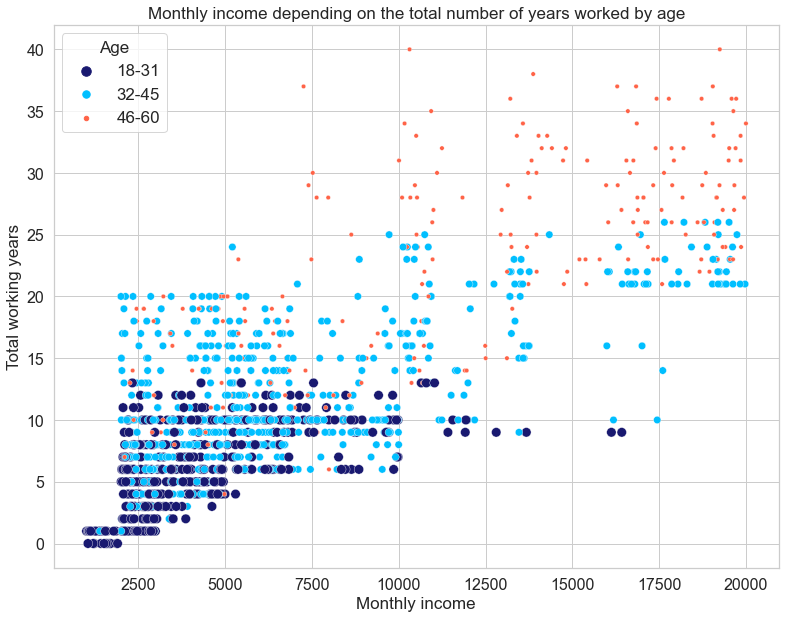

In [68]:
plt.figure(figsize=(13,10))
sns.set_style('whitegrid')
b= pd.Categorical(dane['Age_rank'], categories = ['18-31','32-45', '46-60'], ordered = True)
n=sns.scatterplot(data = dane, x = "MonthlyIncome", y = "TotalWorkingYears", hue = b, size= b,sizes=(20, 90), palette=["#191970","#00BFFF", "#FF6347"])
n.tick_params(labelsize=16)
n.set_xlabel("Monthly income",fontsize=17)
n.set_ylabel("Total working years",fontsize=17)
n.set_title('Monthly income depending on the total number of years worked by age',fontsize=17)
n.legend( loc='upper left', title="Age",fontsize = 17, title_fontsize=17)
plt.show()

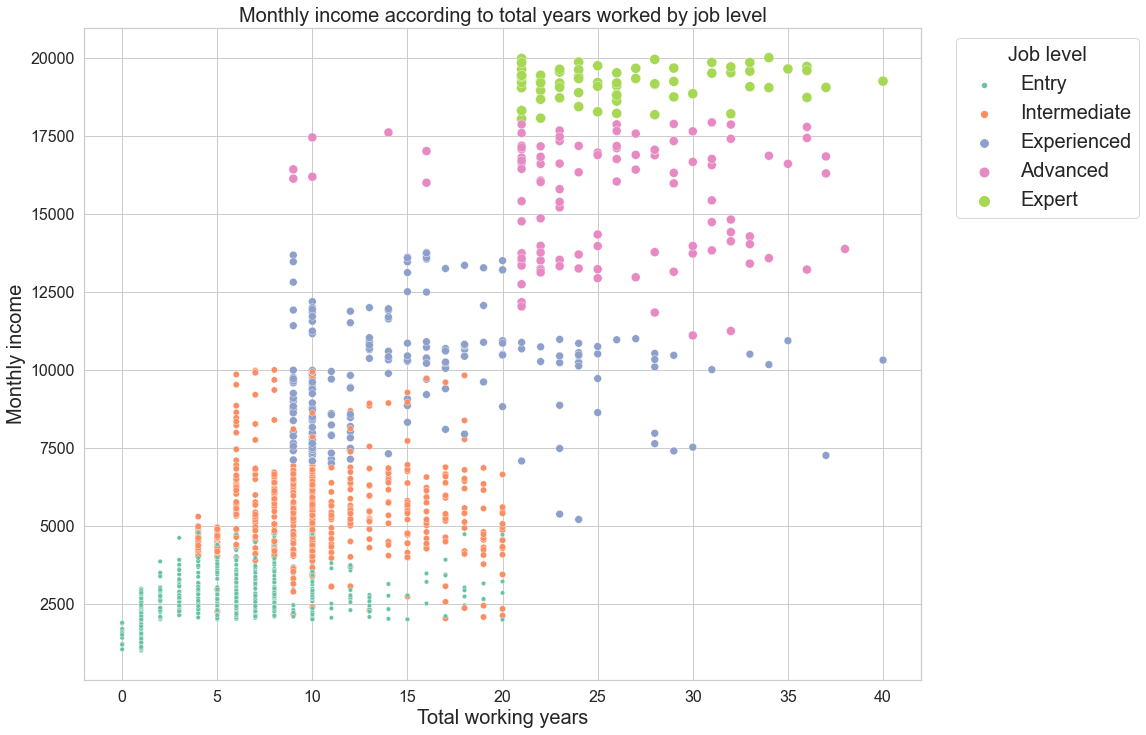

In [72]:
plt.figure(figsize=(15,12))
sns.set_style('whitegrid')
ay=sns.scatterplot(data = dane, x = "TotalWorkingYears", y = "MonthlyIncome", hue = "JobLevel", size= 'JobLevel',sizes=(20, 100), palette="Set2")
handles, labels  =  ay.get_legend_handles_labels()
ay.legend(handles, ['Entry', 'Intermediate','Experienced', 'Advanced', 'Expert'], title="Job level",bbox_to_anchor= (1.03, 1),fontsize = 20, title_fontsize=20)
ay.tick_params(labelsize=16)
ay.set_xlabel("Total working years",fontsize=20)
ay.set_ylabel("Monthly income",fontsize=20)
ay.set_title('Monthly income according to total years worked by job level',fontsize=20)
plt.show()  

In [113]:
df.head(10).style.format({"BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                 .format({"JobTitle": lambda x:x.lower(),
                          "EmployeeName": lambda x:x.lower()})\
                 .hide_index()\
                 .background_gradient(cmap='Blues')

In [109]:
ab=(dane.groupby(['Department', 'JobRole', 'JobLevel'])['JobRole'].agg(['count'])).sort_values(by='Department')
ab

count
Department             JobRole                   JobLevel       
Human Resources        Human Resources           1            33
                                                 2            13
                                                 3             6
                       Manager                   4             4
                                                 5             7
Research & Development Research Scientist        3             1
                                                 2            57
                                                 1           234
                       Research Director         5            26
                                                 4            26
                                                 3            28
                       Manufacturing Director    4            10
                                                 2            90
                                                 3            45
                       Manager                   4            23
                                                 5            23
                       Healthcare Representative 3            44
                                                 4             9
                       Laboratory Technician     1           200
                       Healthcare Representative 2            78
                       Laboratory Technician     3             3
                       Manager                   3             8
                       Laboratory Technician     2            56
Sales                  Sales Representative      1            76
                       Manager                   3             4
                                                 4            20
                                                 5            13
                       Sales Executive           2           233
                                                 3            79
                                                 4            14
                       Sales Representative      2             7

In [132]:
ac = ab.reset_index(drop=True)
ac = ab.reset_index(drop=False)
ac

,Department,JobRole,JobLevel,count
0,Human Resources,Human Resources,1,33
1,Human Resources,Human Resources,2,13
2,Human Resources,Human Resources,3,6
3,Human Resources,Manager,4,4
4,Human Resources,Manager,5,7
5,Research & Development,Research Scientist,3,1
6,Research & Development,Research Scientist,2,57
7,Research & Development,Research Scientist,1,234
8,Research & Development,Research Director,5,26
9,Research & Development,Research Director,4,26


In [162]:
ac.style.format({"BasePay": "${:20,.0f}", 
                          "OtherPay": "${:20,.0f}", 
                          "TotalPay": "${:20,.0f}",
                          "TotalPayBenefits":"${:20,.0f}"})\
                 .hide_index()\
                 .background_gradient(cmap='Blues')\
                .applymap(lambda x: f"color: {'purple' if isinstance(x,str) else 'black'}")

Department,JobRole,JobLevel,count
Human Resources,Human Resources,1,33
Human Resources,Human Resources,2,13
Human Resources,Human Resources,3,6
Human Resources,Manager,4,4
Human Resources,Manager,5,7
Research & Development,Research Scientist,3,1
Research & Development,Research Scientist,2,57
Research & Development,Research Scientist,1,234
Research & Development,Research Director,5,26
Research & Development,Research Director,4,26
